In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = "./Data"

train_transaction = pd.read_csv(''.join((directory, '/train_transaction.csv')))
train_identity = pd.read_csv(''.join((directory, '/train_identity.csv')))

In [85]:
test_transaction = pd.read_csv(''.join((directory, '/test_transaction.csv')))
test_identity = pd.read_csv(''.join((directory, '/test_identity.csv')))

**Transaction Table**

- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

*Categorical Features:*
- ProductCD
- card1 - card6
- addr1, addr2
- Pemaildomain Remaildomain
- M1 - M9

**Identity Table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
- DeviceType
- DeviceInfo
- id12 - id38

In [3]:
train_transaction[['addr1','card6', 'C1', 'C2', 'C3', 'C4', 'M1', 'M2', 'V1', 'V2', 'P_emaildomain', 'R_emaildomain']]

,addr1,card6,C1,C2,C3,C4,M1,M2,V1,V2,P_emaildomain,R_emaildomain
0,315.0,credit,1.0,1.0,0.0,0.0,T,T,1.0,1.0,NaN,NaN
1,325.0,credit,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,gmail.com,NaN
2,330.0,debit,1.0,1.0,0.0,0.0,T,T,1.0,1.0,outlook.com,NaN
3,476.0,debit,2.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,yahoo.com,NaN
4,420.0,credit,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,gmail.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
590535,272.0,debit,2.0,1.0,0.0,0.0,T,T,1.0,1.0,NaN,NaN
590536,204.0,debit,1.0,1.0,0.0,0.0,T,F,1.0,1.0,gmail.com,NaN
590537,231.0,debit,1.0,1.0,0.0,0.0,T,F,1.0,1.0,gmail.com,NaN
590538,387.0,debit,1.0,1.0,0.0,0.0,T,T,1.0,1.0,aol.com,NaN


In [4]:
train_transaction.head(n=10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [6]:
train_transaction.shape

(590540, 394)

In [7]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [8]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [9]:
train_transaction.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [10]:
train_identity.head(n=10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [11]:
train_identity.shape

(144233, 41)

In [12]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [13]:
train_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [14]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [15]:
(train_transaction['isFraud'] == 1).sum(), (train_transaction['isFraud'] == 0).sum()

(20663, 569877)

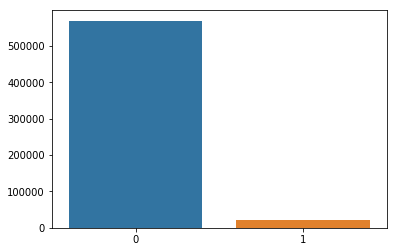

In [16]:
sns.barplot(np.unique(train_transaction['isFraud']), train_transaction.groupby('isFraud').count().values[:,0])
plt.show()

In [17]:
train_transaction.groupby('ProductCD').count().values[:,0]

array([ 68519,  33024,  37699,  11628, 439670], dtype=int64)

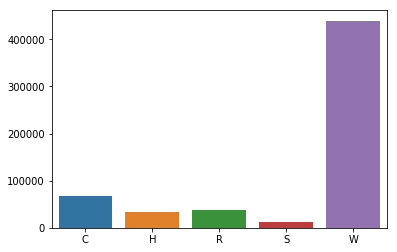

In [18]:
sns.barplot(np.unique(train_transaction['ProductCD']), train_transaction.groupby('ProductCD').count().values[:,0])
plt.show()

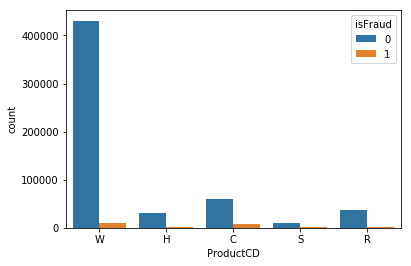

In [19]:
sns.countplot(x='ProductCD', hue='isFraud', data=train_transaction)
plt.show()

In [20]:
cat_transac = ['ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain']

for i in range(1,7):
    cat_transac.append('card'+str(i))
for j in range(1, 10):
    cat_transac.append('M'+str(j))

In [87]:
for var in cat_transac:
    train_transaction[var] = train_transaction[var].astype('category')
    test_transaction[var] = test_transaction[var].astype('category')

In [22]:
train_transaction.dtypes

TransactionID        int64
isFraud              int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
                    ...   
V335               float64
V336               float64
V337               float64
V338               float64
V339               float64
Length: 394, dtype: object

In [95]:
cat_identity = ['DeviceType', 'DeviceInfo']
cat_identity_test = ['DeviceType', 'DeviceInfo']
for i in range(1,10):
    cat_identity.append('id_0'+str(i))
    cat_identity_test.append('id-0'+str(i))
for j in range(10,39):
    cat_identity.append('id_'+str(j))
    cat_identity_test.append('id-'+str(j))

In [97]:
for var in cat_identity:
    train_identity[var] = train_identity[var].astype('category')
for var in cat_identity_test:
    test_identity[var] = test_identity[var].astype('category')

In [98]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [26]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [27]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [139]:
features = []
for var in train.columns:
    if train[var].isnull().sum() == 0:
        features.append(var)
        print(var)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14


In [140]:
features

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [60]:
sub = train[features]
sub = sub.drop(['card1'], axis = 1) #No really a categorical feature

In [143]:
features_test = features.copy()
features_test.pop(1)

'isFraud'

In [146]:
sub_test = test[features_test]
sub_test = sub_test.drop(['card1'], axis = 1)

In [114]:
sub.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD_class
0,2987000,0,86400,68.5,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,4
1,2987001,0,86401,29.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4
2,2987002,0,86469,59.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
3,2987003,0,86499,50.0,W,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,4
4,2987004,0,86506,50.0,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1


In [62]:
sub.dtypes

TransactionID        int64
isFraud              int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
C1                 float64
C2                 float64
C3                 float64
C4                 float64
C5                 float64
C6                 float64
C7                 float64
C8                 float64
C9                 float64
C10                float64
C11                float64
C12                float64
C13                float64
C14                float64
dtype: object

In [145]:
sub_test.dtypes

TransactionID        int64
TransactionDT        int64
TransactionAmt     float64
ProductCD         category
card1             category
C1                 float64
C2                 float64
C3                 float64
C4                 float64
C5                 float64
C6                 float64
C7                 float64
C8                 float64
C9                 float64
C10                float64
C11                float64
C12                float64
C13                float64
C14                float64
dtype: object

In [63]:
sub.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,1.704744e+05,0.183755,4.617224e+06,239.162522,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,2.987000e+06,0.000000,8.640000e+04,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [64]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(sub['ProductCD'])
label_encoded_y = label_encoder.transform(sub['ProductCD'])
sub['ProductCD_class'] = label_encoded_y


In [147]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(sub_test['ProductCD'])
label_encoded_y = label_encoder.transform(sub_test['ProductCD'])
sub_test['ProductCD_class'] = label_encoded_y

In [65]:
sub.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD_class
0,2987000,0,86400,68.5,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,4
1,2987001,0,86401,29.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4
2,2987002,0,86469,59.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
3,2987003,0,86499,50.0,W,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,4
4,2987004,0,86506,50.0,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1


In [127]:
sub_test.head()

,TransactionID,TransactionAmt,ProductCD,C1,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD_class
0,3663549,31.95,W,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,4
1,3663550,49.00,W,3.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,4
2,3663551,171.00,W,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,4
3,3663552,284.95,W,5.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,4
4,3663553,67.95,W,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,4


In [148]:
sub_test = sub_test.drop('ProductCD', axis=1)

In [149]:
sub_test.head()

,TransactionID,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD_class
0,3663549,18403224,31.95,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,4
1,3663550,18403263,49.00,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,4
2,3663551,18403310,171.00,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,4
3,3663552,18403310,284.95,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,4
4,3663553,18403317,67.95,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,4


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = sub['isFraud']
X = sub.drop(['isFraud', 'ProductCD'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [151]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy = {str(accuracy*100)[0:6]}%')

Accuracy = 96.530%


In [207]:
clf.coef_

array([[-1.13846824e-06,  5.71572581e-08, -2.82839499e-11,
         2.08518999e-11,  3.28126573e-11, -1.19473355e-14,
         1.16728454e-11, -8.48512049e-12,  4.97098319e-12,
         9.08071645e-12,  1.71699557e-11, -5.83425015e-12,
         1.39604518e-11,  1.20523748e-11,  1.55653753e-11,
        -2.90836966e-11, -2.43400699e-12, -2.98977370e-12]])

In [157]:
sub.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD_class
0,2987000,0,86400,68.5,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,4
1,2987001,0,86401,29.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4
2,2987002,0,86469,59.0,W,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
3,2987003,0,86499,50.0,W,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,4
4,2987004,0,86506,50.0,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1


In [161]:
sub_test.isnull().sum()

TransactionID         0
TransactionDT         0
TransactionAmt        0
C1                    3
C2                    3
C3                    3
C4                    3
C5                    3
C6                    3
C7                    3
C8                    3
C9                    3
C10                   3
C11                   3
C12                   3
C13                4748
C14                   3
ProductCD_class       0
dtype: int64

In [163]:
sub_test.fillna(sub_test.mean(), inplace=True)

In [164]:
sub_test.isnull().sum()

TransactionID      0
TransactionDT      0
TransactionAmt     0
C1                 0
C2                 0
C3                 0
C4                 0
C5                 0
C6                 0
C7                 0
C8                 0
C9                 0
C10                0
C11                0
C12                0
C13                0
C14                0
ProductCD_class    0
dtype: int64

In [165]:
X_sub = clf.predict(sub_test)

In [166]:
probas = clf.predict_proba(sub_test)

In [211]:
sample_sub = pd.read_csv(''.join((directory, '/sample_submission.csv')))

In [212]:
sample_sub['probas'] = probas[:,0]

In [213]:
sample_sub.head()

,TransactionID,isFraud,probas
0,3663549,0.5,0.957668
1,3663550,0.5,0.957668
2,3663551,0.5,0.957668
3,3663552,0.5,0.957668
4,3663553,0.5,0.957668


In [214]:
sample_sub = sample_sub.drop('isFraud', axis=1)
sample_sub.columns = ['TransactionID', 'isFraud']
sample_sub.head()

,TransactionID,isFraud
0,3663549,0.957668
1,3663550,0.957668
2,3663551,0.957668
3,3663552,0.957668
4,3663553,0.957668


In [220]:
sample_sub.to_csv("./Data/submission.csv", index=False)